## **Importing Required libraries**

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn import metrics
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


## **Importing datasets from sklearn datasets**

In [35]:
house_price_dataset = sklearn.datasets.fetch_california_housing()

In [36]:
#Loading dataset to Pandas Dataframe
house_price_dataframe = pd.DataFrame(house_price_dataset.data, columns=house_price_dataset.feature_names)


In [37]:
#print first five datas of our dataframe
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [38]:
#add target (medhouseVal) in dataframee
house_price_dataframe['MedHouseVal']=house_price_dataset.target

In [39]:
house_price_dataframe.head() #gives_top_5_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [40]:
house_price_dataframe.shape

(20640, 9)

## **# Handling Missing value**

In [41]:
house_price_dataframe.isnull().sum()  #No Missing Present

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [42]:
#stastical measures of dataframe
house_price_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


**Exploratory Data Analysis**

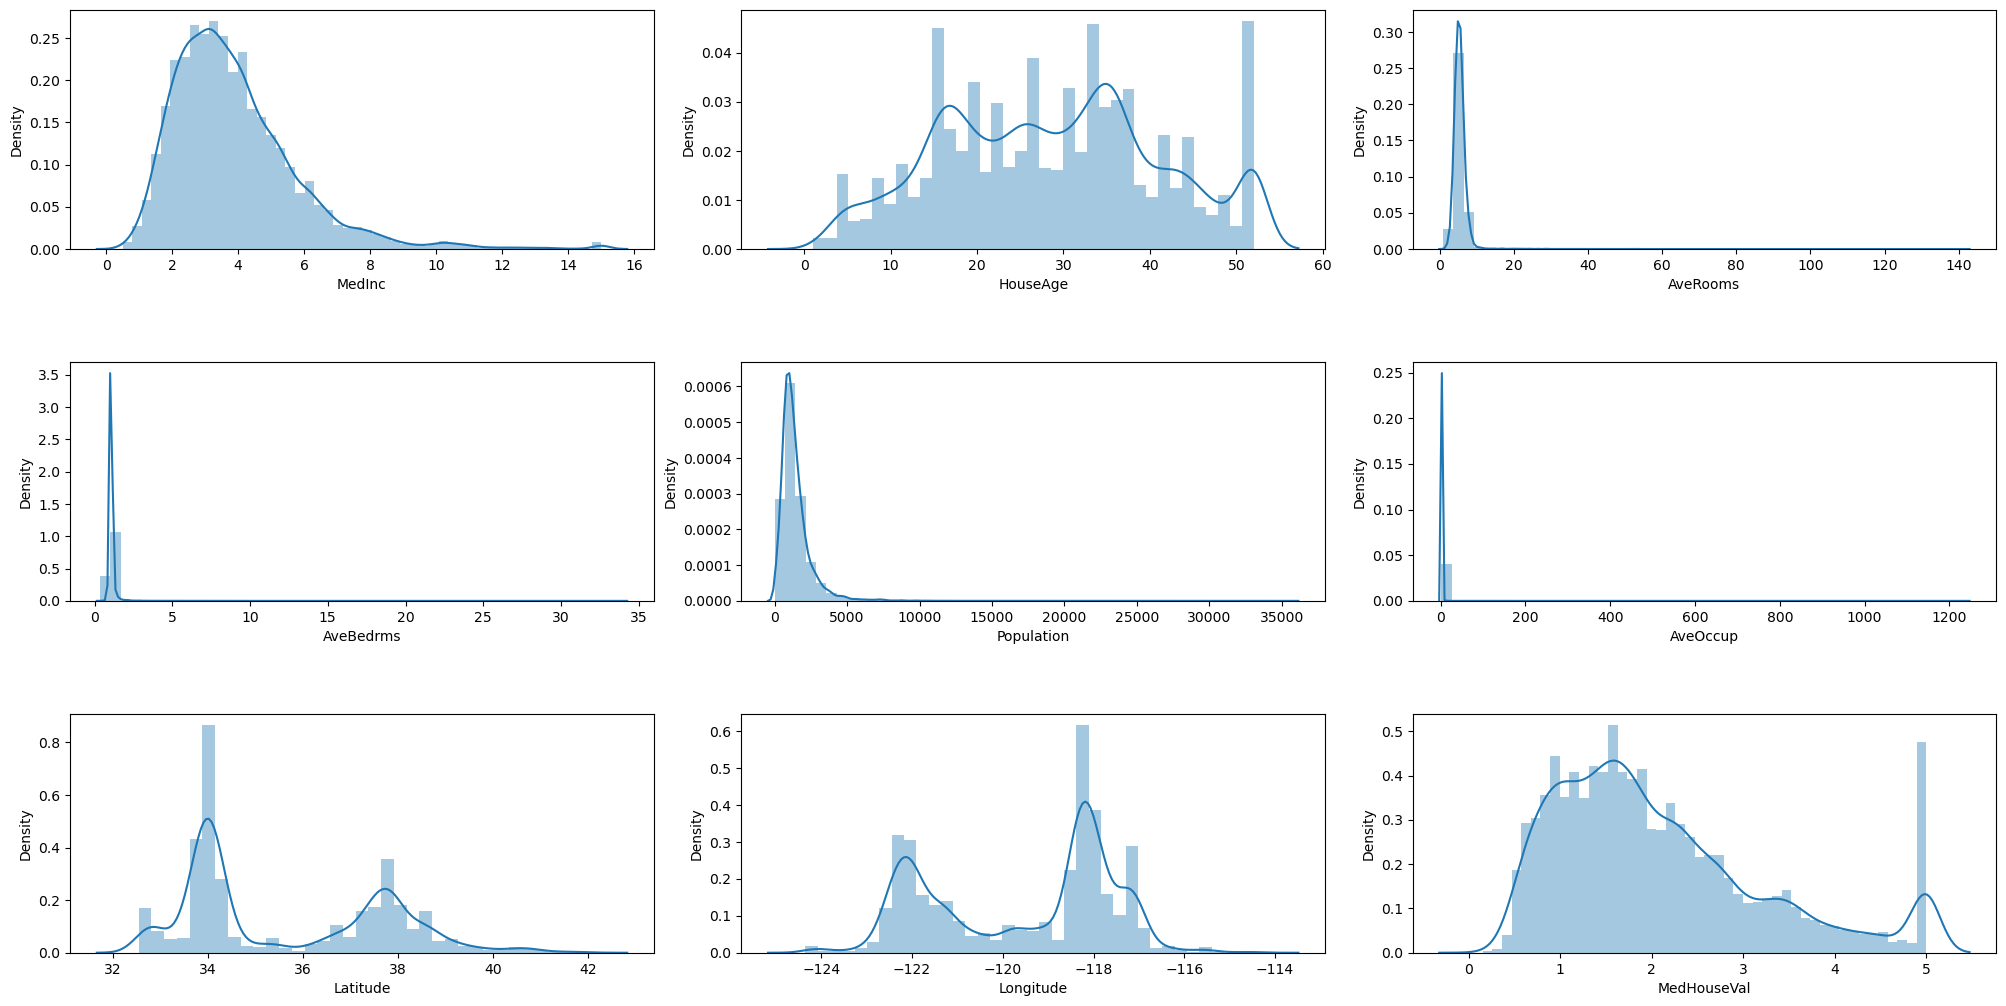

In [60]:
fig, ax = plt.subplots(ncols = 3, nrows =3, figsize = (20,10))
index = 0 
ax = ax.flatten()

for col, value in house_price_dataframe.items():
    sns.distplot(value, ax = ax[index])
    index += 1
    
plt.tight_layout(pad = 0.5, w_pad = 0.7, h_pad = 5.0)

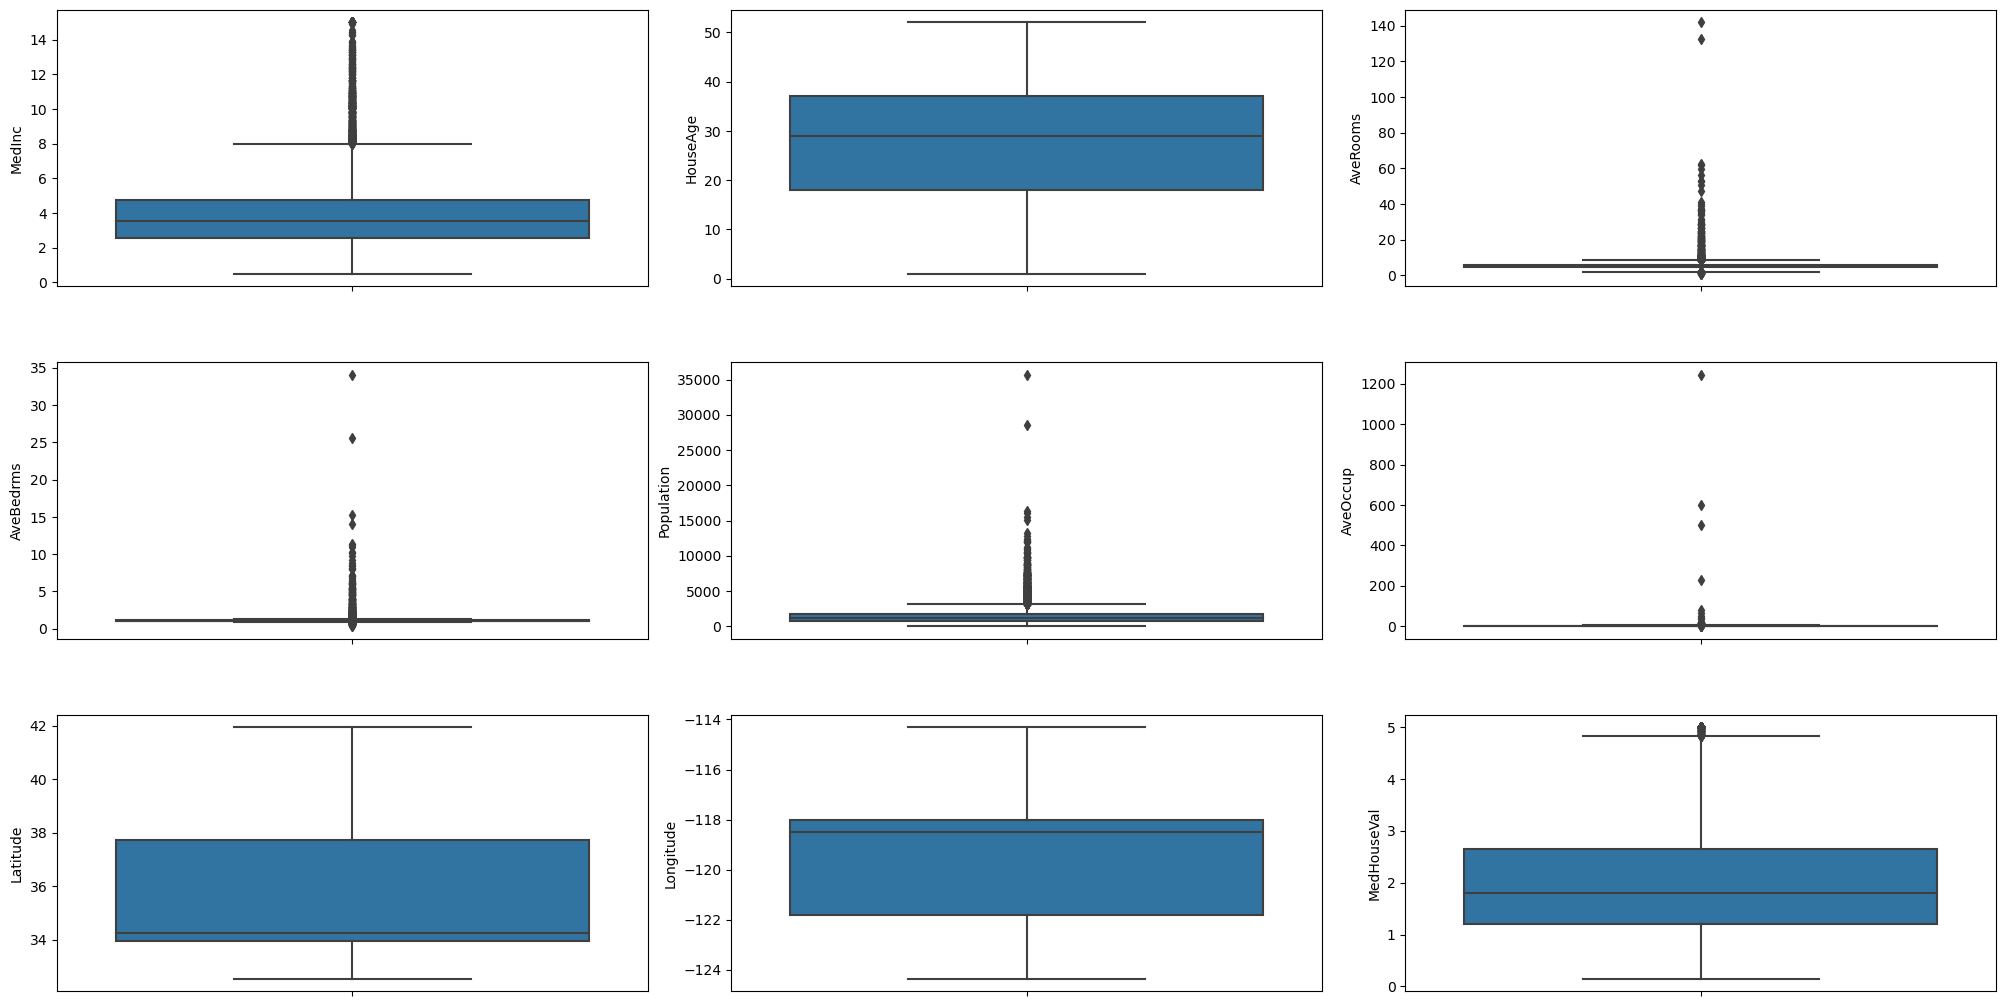

In [64]:
#create box plots 
#helps to detect outliers
fig, ax = plt.subplots(ncols = 3, nrows =3, figsize = (20,10))
index = 0 
ax = ax.flatten()

for col, value in house_price_dataframe.items():
    sns.boxplot(y = col, data = house_price_dataframe, ax = ax[index])
    index += 1
    
plt.tight_layout(pad = 0.5, w_pad = 0.7, h_pad = 5.0)

## **Understanding correlation between features in dataset**

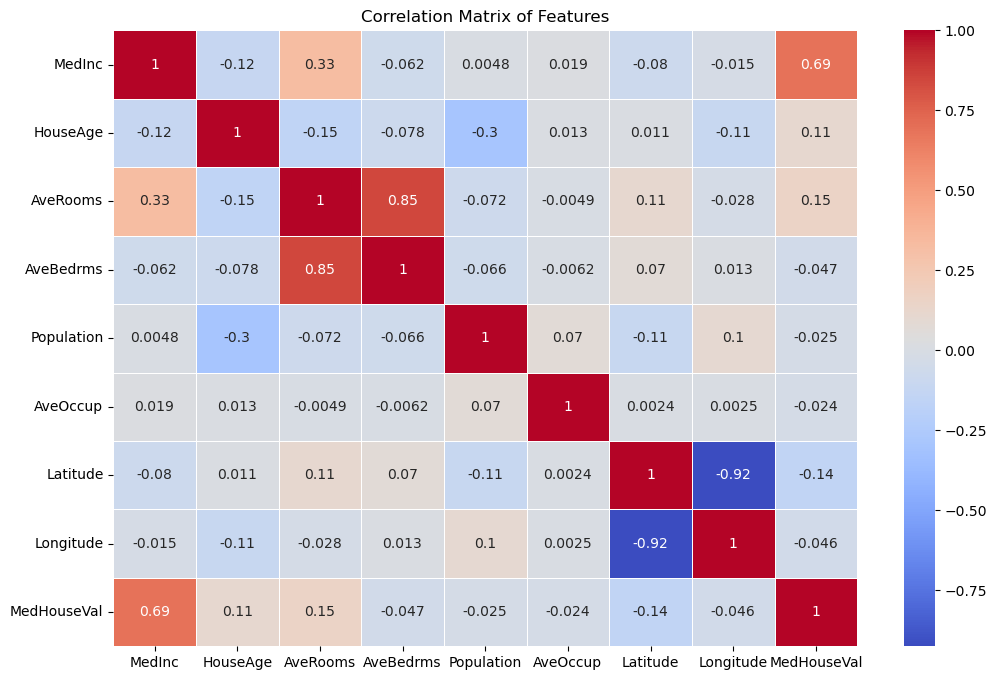

In [43]:
#constructing heatmap to visualize correlation
#Visualizing correlation matrix
correlation_matrix = house_price_dataframe.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()


## **Splitting data and target**

In [44]:
X = house_price_dataframe.drop(['MedHouseVal'], axis=1)   #axis=0 for dropping row and 1 for column
y= house_price_dataframe['MedHouseVal']

In [45]:
X.shape

(20640, 8)

In [46]:
y.shape

(20640,)

# **Splitting data into training and test data**

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=2)

In [48]:
print(X.shape, X_train.shape, X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


# **Model Training using LinearRegressor**

In [49]:
#loading Model
model = LinearRegression()
#training Model
model.fit(X_train, y_train)


LinearRegression()

In [50]:
#evaluating our model
#prdiction on training data
training_predict = model.predict(X_train)
print(training_predict)

[0.58807542 3.17425069 0.96796179 ... 1.53687806 1.78476947 1.21883569]


In [51]:
#r squred error
score_1 = metrics.r2_score(y_train, training_predict)
score_2 = metrics.mean_absolute_error(y_train, training_predict)

In [52]:
print('R square error:', score_1)
print('Mean absolute error:', score_2)

R square error: 0.6068205998456939
Mean absolute error: 0.5303857028686887


In [53]:
test_predict = model.predict(X_test)
print(test_predict)

[2.80991017 1.25276895 1.44720173 ... 1.57213375 1.43077765 2.60233972]


In [54]:
score_3 = metrics.r2_score(y_test, test_predict)
score_4 = metrics.mean_absolute_error(y_test, test_predict)
print('R square error:', score_3)
print('Mean absolute error:', score_4)


R square error: 0.6013853272055153
Mean absolute error: 0.535829254965776


In [65]:
new_data_sample = {
    'MedInc': [3.5],
    'HouseAge': [15],
    'AveRooms': [4],
    'AveBedrms': [1],
    'Population': [300],
    'AveOccup': [2],
    'Latitude': [37.85],
    'Longitude': [-122.23]
}

new_data = pd.DataFrame(new_data_sample)

# Predicting the house price using the trained model
predicted_house_price = model.predict(new_data)

print(f"Predicted House Price: ${predicted_house_price[0]*1000000:.2f}")  # The target in the dataset is scaled by a factor of 100,000.

Predicted House Price: $2109997.79


Visualizing the actual Prices and Predicted Prices

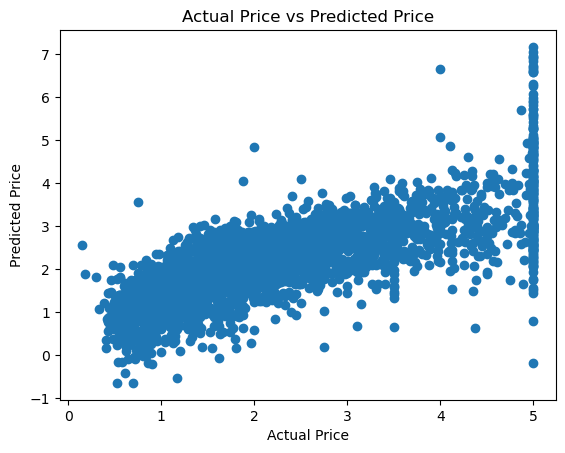

In [67]:
plt.scatter(y_test, test_predict)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()